In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import chi2_contingency
from scipy.stats import ttest_1samp
from scipy.stats import binom_test

In [3]:
# load data
heart = pd.read_csv('heart_disease.csv')
yes_hd = heart[heart.heart_disease == 'presence']
no_hd = heart[heart.heart_disease == 'absence']

In [7]:
#investigate cholesterol levels for patients with heart disease
chol_hd = yes_hd["chol"]
chol_hd_mean = np.mean(chol_hd)
tstat, pval = ttest_1samp(chol_hd, 240)
print(pval)
#conclusion: the probability of hd people having chol level more than 240 is significant

0.007082206781031141


In [8]:
#investigate cholesterol levels for patients without heart disease
chol_no_hd = no_hd["chol"]
chol_no_hd_mean = np.mean(chol_no_hd)
tstat, pval = ttest_1samp(chol_no_hd, 240)
print(pval)
#probability of people without hd having chol more than 240 is not significant

0.5279424046444101


In [11]:
#fasting blood sugar analysis
num_patients = len(heart)
num_highfbs_patients = np.sum(heart.fbs == 1)
# amount of people having diabets due to 1988 research:
amount = 303*0.08
# binominal test Null: 8% Alternative: more than 8%
pval_binom = binom_test(num_highfbs_patients, num_patients, 0.08, alternative = "greater")
print(pval_binom)
#the probability is from population of 8%


4.689471951449078e-05


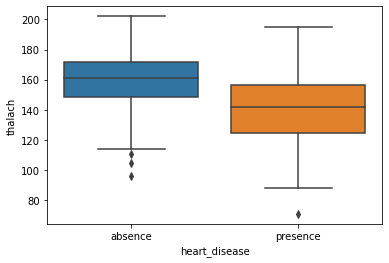

In [12]:
sns.boxplot(x = heart.heart_disease, y = heart.thalach)
plt.show()
thalach_hd = heart.thalach[heart.heart_disease == "presence"]
thalach_no_hd = heart.thalach[heart.heart_disease == "absence"]
mean_diff = np.mean(thalach_hd) - np.mean(thalach_no_hd)

In [13]:
#finding out if the average thalach of a heart disease patient is significantly different from the average thalach for a person without heart disease
tstat, pval = ttest_ind(thalach_hd, thalach_no_hd)
print(pval)
#Conclusion: the difference is significant

3.456964908430172e-14


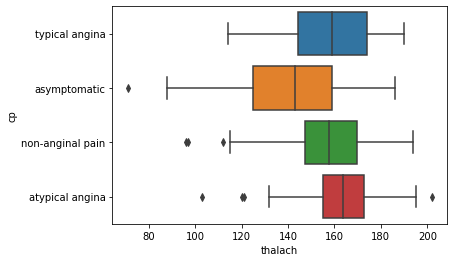

1.9065505247705008e-10
           Multiple Comparison of Means - Tukey HSD, FWER=0.05           
     group1           group2      meandiff p-adj   lower    upper  reject
-------------------------------------------------------------------------
    asymptomatic  atypical angina  21.7394  0.001  12.7439  30.735   True
    asymptomatic non-anginal pain  14.7264  0.001    7.258 22.1948   True
    asymptomatic   typical angina   15.276 0.0081   2.9702 27.5817   True
 atypical angina non-anginal pain   -7.013 0.2481 -16.7591   2.733  False
 atypical angina   typical angina  -6.4635 0.6069 -20.2707  7.3438  False
non-anginal pain   typical angina   0.5495    0.9  -12.315 13.4141  False
-------------------------------------------------------------------------


In [14]:
plt.clf()
sns.boxplot(x = heart.thalach, y = heart.cp)
plt.show()
 #find the significance of chest pain thalach
thalach_typical = heart.thalach[heart.cp == "typical angina"]
thalach_asymptom = heart.thalach[heart.cp == "asymptomatic"]
thalach_nonangin = heart.thalach[heart.cp == "non-anginal pain"]
thalach_atypical = heart.thalach[heart.cp == "atypical angina"]
fstat, pval_two = f_oneway(thalach_typical, thalach_asymptom,thalach_nonangin,  thalach_atypical)
print(pval_two)
pval_three = pairwise_tukeyhsd(heart.thalach, heart.cp)
print(pval_three)

In [16]:
#investigate the relationship between the kind of chest pain a person experiences and whether or not they have heart disease

Xtab = pd.crosstab(heart.cp, heart.heart_disease)
chi2, pval_four, dof, expected = chi2_contingency(Xtab)
print(pval_four)
print(Xtab)

1.2517106007837527e-17
heart_disease     absence  presence
cp                                 
asymptomatic           39       105
atypical angina        41         9
non-anginal pain       68        18
typical angina         16         7
